In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the stock price data

In [2]:
data = pd.read_csv('MSFT.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9402,2023-07-05,335.089996,341.649994,334.730011,338.149994,338.149994,18172400
9403,2023-07-06,337.299988,342.989990,335.500000,341.269989,341.269989,28161200
9404,2023-07-07,339.320007,341.790009,337.000000,337.220001,337.220001,21185300
9405,2023-07-10,334.600006,335.230011,327.589996,331.829987,331.829987,32791400


# Preprocess the data

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
scaled_data

array([[1.99534652e-05],
       [2.99301978e-05],
       [3.49214376e-05],
       ...,
       [9.68736492e-01],
       [9.53248379e-01],
       [9.55087448e-01]])

# Split the data into training and testing sets

In [4]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
train_size,train_data,test_data

(7525,
 array([[1.99534652e-05],
        [2.99301978e-05],
        [3.49214376e-05],
        ...,
        [1.48127241e-01],
        [1.52351267e-01],
        [1.46259486e-01]]),
 array([[0.14502389],
        [0.14568479],
        [0.144794  ],
        ...,
        [0.96873649],
        [0.95324838],
        [0.95508745]]))

# Convert the data into sequences

In [5]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
X_train, y_train
X_test, y_test

(array([[[0.14502389],
         [0.14568479],
         [0.144794  ],
         ...,
         [0.14933411],
         [0.15804076],
         [0.15694883]],
 
        [[0.14568479],
         [0.144794  ],
         [0.14999501],
         ...,
         [0.15804076],
         [0.15694883],
         [0.15203518]],
 
        [[0.144794  ],
         [0.14999501],
         [0.14855827],
         ...,
         [0.15694883],
         [0.15203518],
         [0.14962146]],
 
        ...,
 
        [[0.97589144],
         [0.96241479],
         [0.94396708],
         ...,
         [0.97094904],
         [0.97140881],
         [0.98037406]],
 
        [[0.96241479],
         [0.94396708],
         [0.96112178],
         ...,
         [0.97140881],
         [0.98037406],
         [0.96873649]],
 
        [[0.94396708],
         [0.96112178],
         [0.96479983],
         ...,
         [0.98037406],
         [0.96873649],
         [0.95324838]]]),
 array([[0.15203518],
        [0.14962146],
        [0.

# Build the LSTM model

In [6]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

In [7]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
235/235 [==============================] - 7s 16ms/step - loss: 1.7913e-04
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 1.0868e-05
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 1.0943e-05
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 1.0348e-05
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 1.0502e-05
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 1.0433e-05
Epoch 7/50
235/235 [==============================] - 3s 15ms/step - loss: 1.1589e-05
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 9.2151e-06
Epoch 9/50
235/235 [==============================] - 4s 15ms/step - loss: 9.3748e-06
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 9.1859e-06
Epoch 11/50
235/235 [==============================] - 4s 16ms/step - loss: 8.5927e-06
Epoch 12/50
235/235 [==============================]

# Make predictions

In [8]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

59/59 [==============================] - 1s 8ms/step


# Plot the train predictions

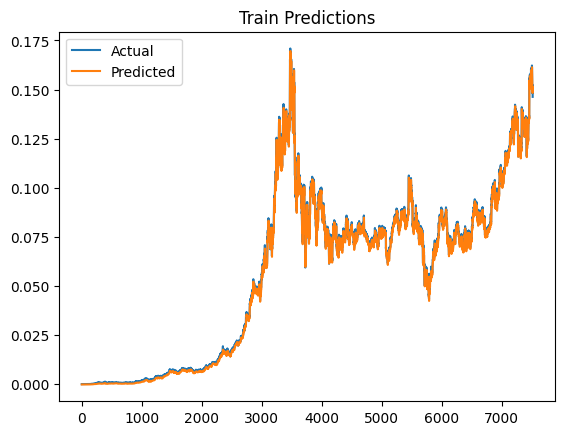

In [9]:
plt.plot(y_train, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('Train Predictions')
plt.legend()
plt.show()

# Plot the test predictions

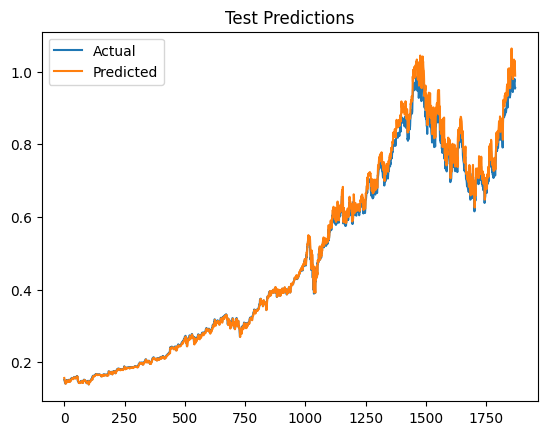

In [10]:
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('Test Predictions')
plt.legend()
plt.show()

# Inverse transform the predictions

In [11]:
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the train predictions

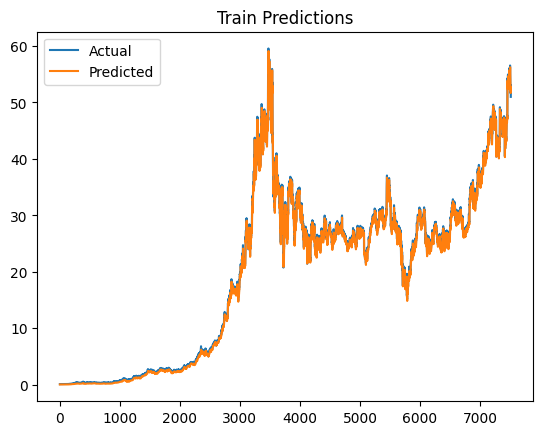

In [12]:
plt.plot(y_train, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('Train Predictions')
plt.legend()
plt.show()

# Plot the test predictions

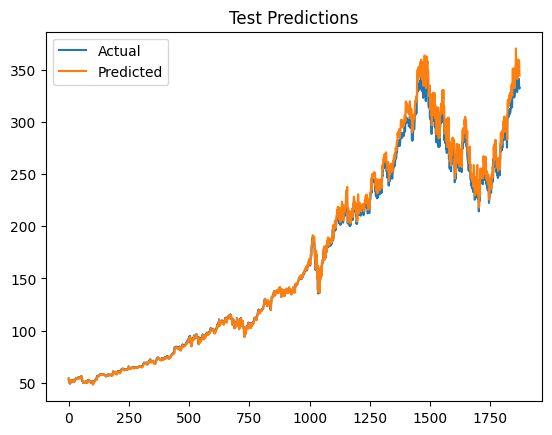

In [13]:
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('Test Predictions')
plt.legend()
plt.show()

# Plot the results

<Figure size 1200x600 with 0 Axes>

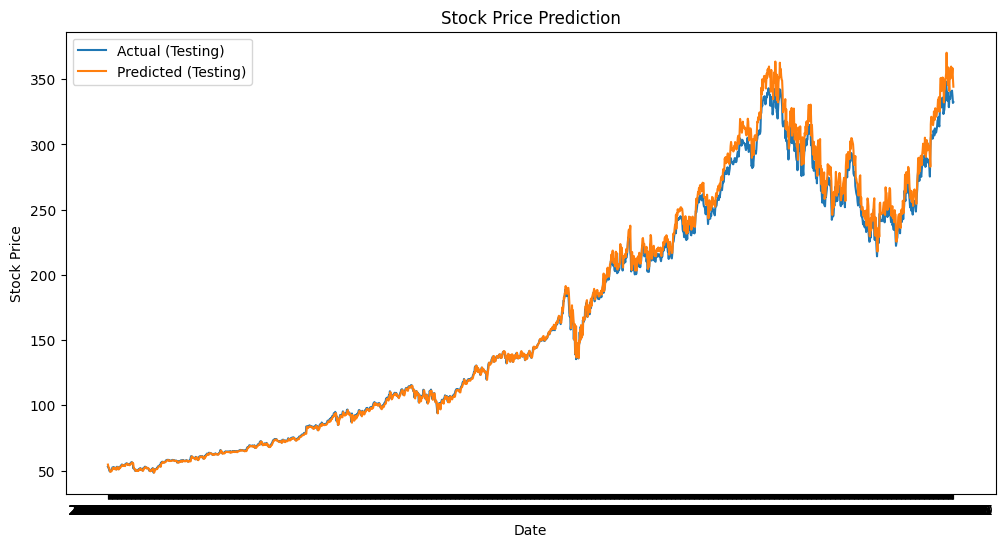

In [15]:
plt.figure(figsize=(12, 6))
#Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][train_size+seq_length:], y_test, label='Actual (Testing)')
plt.plot(data['Date'][train_size+seq_length:], test_predictions, label='Predicted (Testing)')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.legend()
plt.show()